# Perceptron and Logistic Regression Classifier

In this notebook I will develop three classifiers:

1. Perceptron
2. Least-Squares
3. Least-Squares with quadratic features

The Classifiers will have key metrics reported on:
1. Binary class
* Accuracy
* Sensitivity
* Specificity
* PPV
* AUC

2. Multi-class
* Confusion matrix - normalized over True class and Predicted Class

## The Data
Data is in an excel file. The file has a worksheet termed 'Data' There are 19,214 observations over 11 features. There are no data dictionary. The two labels are 'Failure Alert' and 'Diagnostic Code'.

Variable names have been defined for submission as follows:

#### Perceptron
* acc_P	            : Accuracy of perceptron classifier
* sen_P	            : Sensitivity of perceptron classifier
* spe_P	            : Specificity of perceptron classifier
* ppv_P	            : PPV of perceptron classifier
* auc_P	            : AUC of perceptron classifier
* cm_true_P	        : Confusion Matrix (Normalized over true class) of perceptron classifier
* cm_pred_P	        : Confusion Matrix (Normalized over predicted class) of perceptron classifier

#### Least-Squares	
* acc_LSQ	        : Accuracy of least-squares classifier
* sen_LSQ	        : Sensitivity of least-squares classifier
* spe_LSQ	        : Specificity of least-squares classifier
* ppv_LSQ	        : PPV of least-squares classifier
* auc_LSQ	        : AUC of least-squares classifier
* cm_true_LSQ	    : Confusion Matrix (Normalized over true class) of least-squares classifier
* cm_pred_LSQ	    : Confusion Matrix (Normalized over predicted class) of least-squares classifier

#### Least-Squares with quadratic features	
* acc_LSQ_Quad	    : Accuracy of least-squares quadratic classifier
* sen_LSQ_Quad	    : Sensitivity of least-squares quadratic classifier
* spe_LSQ_Quad	    : Specificity of least-squares quadratic classifier
* ppv_LSQ_Quad	    : PPV of least-squares quadratic classifier
* auc_LSQ_Quad	    : AUC of least-squares quadratic classifier
* cm_true_LSQ_Quad	: Confusion Matrix (Normalized over true class) of least-squares quadratic classifier
* cm_pred_LSQ_Quad	: Confusion Matrix (Normalized over predicted class) of least-squares quadratic classifier

## Importing packages

In [54]:
# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read and write data
from pandas import ExcelWriter, ExcelFile, read_excel, DataFrame, concat
from openpyxl import load_workbook

# Data pre-processing tools 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sci-kit Learn models
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

# Model evaluation tools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.base import BaseEstimator, ClassifierMixin

## Custom functions to read and write data

In [2]:
# Function to read excel file worksheet
def readExcelSheet1(excelfile):
    return (read_excel(excelfile)).values

# Function to define range to read
def readExcelRange(excelfile,sheetname="Sheet1",startrow=1,endrow=1,startcol=1,endcol=1):
    values=(read_excel(excelfile, sheetname,header=None)).values
    return values[startrow-1:endrow,startcol-1:endcol]

# Function bringing the two above functions together to read data
def readExcel(excelfile,**args):
    if args:
        data=readExcelRange(excelfile,**args)
    else:
        data=readExcelSheet1(excelfile)
    [nr,nc]=data.shape
    if [nr,nc]==[1,1]:
        return data[0,0]
    elif min([nr,nc])==1:
        return np.squeeze(data)
    else:
        return data

# Function to write excel file worksheet
def writeExcelData(x,excelfile,sheetname,startrow,startcol):
    df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()

def getSheetNames(excelfile):
    return (ExcelFile(excelfile)).sheet_names

# Listing all variables
all_vars = [\
            'acc_P',\
            'sen_P',\
            'spe_P',\
            'ppv_P',\
            'auc_P',\
            'cm_true_P',\
            'cm_pred_P',\
            'acc_LSQ',\
            'sen_LSQ',\
            'spe_LSQ',\
            'ppv_LSQ',\
            'auc_LSQ',\
            'cm_true_LSQ',\
            'cm_pred_LSQ',\
            'acc_LSQ_Quad',\
            'sen_LSQ_Quad',\
            'spe_LSQ_Quad',\
            'ppv_LSQ_Quad',\
            'auc_LSQ_Quad',\
            'cm_true_LSQ_Quad',\
            'cm_pred_LSQ_Quad',\
           ]

# Function checking if variable exists
def check_one_var(varstring):
  try:
    exec(varstring)
  except NameError:
    print('***** Error! ' + varstring + ' is not defined. *****')
    return False
  else:
#     print(varstring + ' exists.')
    return True

# Function bringing the above two together to check all variables exist
def check_all_vars(all_vars):
  return all(list(map(check_one_var, all_vars)))

# Function to export results
def export_results(excelfile):
    if check_all_vars(all_vars):
        print('Be patient. Writing results to Excel file ', end='')
        offset = 0

        writeExcelData([[acc_P], [sen_P], [spe_P], [ppv_P], [auc_P]], excelfile, 'Metrics', offset + 13, 7)
        print('.', end='')
        writeExcelData(cm_true_P, excelfile, 'Metrics', offset + 15, 13)
        print('.', end='')
        writeExcelData(cm_pred_P, excelfile, 'Metrics', offset + 15, 24)
        print(' 33% done ', end='')

        offset = 15

        writeExcelData([[acc_LSQ], [sen_LSQ], [spe_LSQ], [ppv_LSQ], [auc_LSQ]], excelfile, 'Metrics', offset + 13, 7)
        print('.', end='')
        writeExcelData(cm_true_LSQ, excelfile, 'Metrics', offset + 15, 13)
        print('.', end='')
        writeExcelData(cm_pred_LSQ, excelfile, 'Metrics', offset + 15, 24)
        print(' 66% done ', end='')

        offset = 30

        writeExcelData([[acc_LSQ_Quad], [sen_LSQ_Quad], [spe_LSQ_Quad], [ppv_LSQ_Quad], [auc_LSQ_Quad]], excelfile, 'Metrics', offset + 13, 7)
        print('.', end='')
        writeExcelData(cm_true_LSQ_Quad, excelfile, 'Metrics', offset + 15, 13)
        print('.', end='')
        writeExcelData(cm_pred_LSQ_Quad, excelfile, 'Metrics', offset + 15, 24)
        print(' All done!')
    else:
        print(' Something went wrong. Please check variables.')

## Loading Data

In [3]:
excelfile = 'Data_and_Template.xlsx'

In [8]:
data = readExcelSheet1(excelfile)
data.shape

(19214, 11)

In [10]:
# Defining X and y for modelling purpose
X_data = data[:,:9] # Failure alert and diagnostics are left out as they are labels
y_multi = data[:,-1] # Diagnostics used as label for multi class classification
y_bin = data[:,-2] # Failure alert used as label for binary classification

In [11]:
# Checking X data
X_data[:10]

array([[239, 155, 164, 180, 199, 224, 'High', 'Low', 'Low'],
       [219, 197, 159, 191, 206, 209, 'Low', 'Low', 'Low'],
       [130, 233, 108, 192, 180, 203, 'Med', 'Low', 'High'],
       [156, 227, 168, 253, 146, 208, 'Low', 'Low', 'Low'],
       [325, 255, 159, 244, 179, 236, 'Low', 'Low', 'Med'],
       [249, 169, 169, 144, 153, 227, 'Low', 'Low', 'Low'],
       [127, 133, 179, 216, 314, 185, 'Med', 'Med', 'Low'],
       [223, 153, 195, 193, 235, 182, 'Low', 'Low', 'High'],
       [270, 294, 209, 246, 280, 217, 'High', 'High', 'Med'],
       [214, 258, 147, 247, 152, 188, 'High', 'Low', 'Low']], dtype=object)

In [12]:
# Checking y data
y_multi[:10]

array(['F', 'B', 'E', 'E', 'C', 'B', 'E', 'A', 'C', 'C'], dtype=object)

In [13]:
y_bin[:10]

array(['Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail',
       'Fail', 'Fail'], dtype=object)

## Feature encoding

In [15]:
# Using OneHotEncoder to change categories to numbers
X_categ = X_data[:, 6:9]
enc = OneHotEncoder(sparse=False)
enc.fit(X_categ)

# Listing categories that OneHotEncoder will transform
enc.categories_

[array(['High', 'Low', 'Med'], dtype=object),
 array(['High', 'Low', 'Med'], dtype=object),
 array(['High', 'Low', 'Med'], dtype=object)]

In [16]:
# Checking transformation
enc.transform(X_categ)

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [17]:
# Defining X for modelling
X = np.concatenate((X_data[:, :5], enc.transform(X_categ)), axis=1)

In [27]:
X_data

array([[239, 155, 164, ..., 'High', 'Low', 'Low'],
       [219, 197, 159, ..., 'Low', 'Low', 'Low'],
       [130, 233, 108, ..., 'Med', 'Low', 'High'],
       ...,
       [252, 193, 205, ..., 'Low', 'Low', 'Med'],
       [232, 175, 204, ..., 'High', 'Low', 'Med'],
       [190, 204, 132, ..., 'Med', 'Low', 'Low']], dtype=object)

In [25]:
X

array([[239, 155, 164, ..., 0.0, 1.0, 0.0],
       [219, 197, 159, ..., 0.0, 1.0, 0.0],
       [130, 233, 108, ..., 1.0, 0.0, 0.0],
       ...,
       [252, 193, 205, ..., 0.0, 0.0, 1.0],
       [232, 175, 204, ..., 0.0, 0.0, 1.0],
       [190, 204, 132, ..., 0.0, 1.0, 0.0]], dtype=object)

In [29]:
enc.get_feature_names_out()

array(['x0_High', 'x0_Low', 'x0_Med', 'x1_High', 'x1_Low', 'x1_Med',
       'x2_High', 'x2_Low', 'x2_Med'], dtype=object)

## Splitting Train and Test data sets

In [30]:
# Splitting the data. y will be defined seperately and so indices are being used
X_train, X_test, indices_train, indices_test = train_test_split(X, range(len(X)), test_size=0.25, random_state=0)

In [31]:
# Assigning y train and test to mulit-class labels
y_train = y_multi[indices_train]
y_test = y_multi[indices_test]

In [33]:
# Assigning y train and test to binary classification labels
y_bin_train = y_bin[indices_train]
y_bin_test = y_bin[indices_test]

## Scaling the data

In [38]:
# Using standard scalar
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Checking scaled and non-scaled data
X_train, X_train_scaled

(array([[243, 186, 179, ..., 0.0, 1.0, 0.0],
        [225, 215, 170, ..., 0.0, 1.0, 0.0],
        [157, 259, 93, ..., 0.0, 0.0, 1.0],
        ...,
        [241, 187, 139, ..., 0.0, 1.0, 0.0],
        [178, 195, 232, ..., 1.0, 0.0, 0.0],
        [219, 200, 157, ..., 0.0, 1.0, 0.0]], dtype=object),
 array([[ 0.36446917, -0.48140185, -0.03699833, ..., -0.43974395,
          0.68455085, -0.43162616],
        [-0.0653963 ,  0.17184002, -0.2576409 , ..., -0.43974395,
          0.68455085, -0.43162616],
        [-1.6893325 ,  1.16296562, -2.1453606 , ..., -0.43974395,
         -1.46081186,  2.31681971],
        ...,
        [ 0.31670634, -0.45887627, -1.01763195, ..., -0.43974395,
          0.68455085, -0.43162616],
        [-1.18782279, -0.27867162,  1.2623412 , ...,  2.27405062,
         -1.46081186, -0.43162616],
        [-0.20868478, -0.16604371, -0.57634682, ..., -0.43974395,
          0.68455085, -0.43162616]]))

## Perceptron

In [46]:
# Model already imported
# Instantiate the model
clf_P = Perceptron()

# Fit the model
clf_P.fit(X_train_scaled, y_train)

# Making predictions
y_pred_P_test = clf_P.predict(X_test_scaled)

In [47]:
# Checking accuracy
acc_P = clf_P.score(X_test_scaled, y_test)
acc_P

0.5738967527060783

## Confusion Matrix

In [48]:
confusion_matrix(y_test, y_pred_P_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'])

array([[364,  72,  62,  13,   2,   0],
       [  1, 844, 135,  65,  53,   0],
       [ 34, 134, 377,  53,  78,  52],
       [ 38,  68, 216,  75, 114,  11],
       [ 29,  77,  29,  51, 756,  16],
       [  5, 320, 258,  47,  14, 341]], dtype=int64)

### True normalized confusion matrix

In [49]:
confusion_matrix(y_test, y_pred_P_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'], normalize='true')

array([[0.70955166, 0.14035088, 0.1208577 , 0.02534113, 0.00389864,
        0.        ],
       [0.00091075, 0.76867031, 0.12295082, 0.05919854, 0.04826958,
        0.        ],
       [0.0467033 , 0.18406593, 0.51785714, 0.0728022 , 0.10714286,
        0.07142857],
       [0.07279693, 0.1302682 , 0.4137931 , 0.14367816, 0.2183908 ,
        0.0210728 ],
       [0.0302714 , 0.08037578, 0.0302714 , 0.05323591, 0.78914405,
        0.01670146],
       [0.00507614, 0.3248731 , 0.26192893, 0.04771574, 0.0142132 ,
        0.34619289]])

### Prediction normalized confusion matrix

In [50]:
confusion_matrix(y_test, y_pred_P_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'], normalize='pred')

array([[0.77282378, 0.04752475, 0.05756732, 0.04276316, 0.00196657,
        0.        ],
       [0.00212314, 0.55709571, 0.12534819, 0.21381579, 0.05211406,
        0.        ],
       [0.07218684, 0.08844884, 0.35004643, 0.17434211, 0.07669617,
        0.12380952],
       [0.08067941, 0.04488449, 0.2005571 , 0.24671053, 0.1120944 ,
        0.02619048],
       [0.06157113, 0.05082508, 0.02692665, 0.16776316, 0.74336283,
        0.03809524],
       [0.01061571, 0.21122112, 0.23955432, 0.15460526, 0.01376598,
        0.81190476]])

### Plotting Confusion matrix

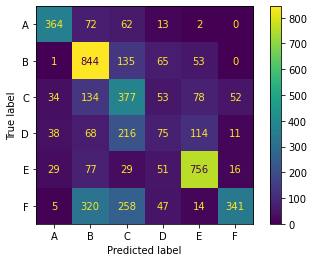

In [62]:
ConfusionMatrixDisplay.from_estimator(clf_P, X_test_scaled, y_test)
plt.show;

## Least Squares

In [63]:
# Creating a Least Squares Classifier class

class LSQClassifier(BaseEstimator, ClassifierMixin):
    """
    LSQClassifier()
    
    Least-squares (aka pseudoinverse) classifier. 
    
    Parameters
    ----------
    None
    
    Attributes
    ----------
    classes_ : ndarray of shape (n_classes,)
        The unique classes labels.

    n_classes_ : int
        The number of unique classes labels.

    intercept_ : ndarray of shape = (1, ) if n_classes == 2 else (n_classes, )
        Constants in decision function.

    coef_ : ndarray of shape = (1, n_features) if n_classes == 2 else (n_classes, n_features)
        Weights assigned to the features.

    classifier_ : ndarray of shape = (1, 1 + n_features) if n_classes == 2 else (n_classes, 1 + n_features)
        Constant and weights assigned to the features.

    keslerdict_ : dict of length n_classes
        Dictionary associating class labels to one-hot codes using values +1 & -1

    """
    def __init__(self):
        pass
        
    def fit(self, X, y):
        self.classes_ = np.unique(y) # Determine unique class labels
        self.n_classes_ = len(self.classes_) # Determine number of classes
        self.keslerdict_ = {c:[1 if c==u else -1 for u in self.classes_] for c in self.classes_}
        y_ohe = np.array([self.keslerdict_[label] for label in y]) # Create one hot encoded version of y

        if self.n_classes_ == 2: # Binary case has to be handled differently
            y_ohe = y_ohe[:, [1]]

        Xa = np.c_[np.ones(len(X)),X] # Augment X
        Xapi = np.linalg.pinv(Xa) # Pseudoinverse of Xa

        self.classifier_ = np.dot(Xapi, y_ohe).T # Least-squares or pseudoinverse classifier (Transpose of W in lecture notes)
        
        self.intercept_ = self.classifier_[:, 0] # Needed to maintain compatibility with other sklearn classifiers
        self.coef_ = self.classifier_[:, 1:] # Needed to maintain compatibility with other sklearn classifiers

        return self
    
    def predict(self, X):
        Xa = np.c_[np.ones(len(X)),X] # Augment X
        y_out = np.dot(Xa, self.classifier_.T)  # Compute raw output
        
        if self.n_classes_ == 2: # Handle binary case
            inv_kesler = {v[1]: k for k, v in self.keslerdict_.items()}
            #[f(x) if condition else g(x) for x in sequence]
            sign_y_out = [+1 if y >= 0 else -1 for y in np.squeeze(y_out)]
            y_pred = np.array([inv_kesler[s] for s in sign_y_out])
        else: # Handle multiclass case
            y_pred = self.classes_[np.argmax(y_out, axis=1)]
        return y_pred
    
    def decision_function(self, X):
        Xa = np.c_[np.ones(len(X)),X] # Augment X
        y_out = np.dot(Xa, self.classifier_.T)  # Compute raw output
        
        if self.n_classes_ == 2: # Handle binary case
            y_dec_fun = np.squeeze(y_out)
        else: # Handle multiclass case
            y_dec_fun = y_out

        return y_dec_fun

### Apply LSQ Classifier

In [64]:
# Instantiate LSQ Classifier
clf_LSQ = LSQClassifier()

# Fit the LSQ Classifier
clf_LSQ.fit(X_train_scaled, y_train)

# Predicitons using the LSQ classifier
y_pred_LSQ_test = clf_LSQ.predict(X_test_scaled) # Predict

In [65]:
# Checking accuracy score
acc_LSQ = clf_LSQ.score(X_test_scaled, y_test)
acc_LSQ

0.6065778517901749

### Confusion Matrix for LSQ Classifier

In [66]:
confusion_matrix(y_test, y_pred_LSQ_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'])

array([[118, 263,  39,   1,  72,  20],
       [  1, 928,   1,   0,  67, 101],
       [ 16, 132, 168, 105, 112, 195],
       [ 24, 126,  50, 158, 137,  27],
       [  2,  70,   7,  25, 853,   1],
       [  1, 214,  40,   0,  41, 689]], dtype=int64)

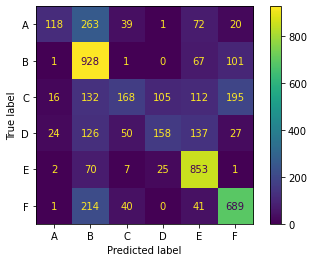

In [67]:
ConfusionMatrixDisplay.from_estimator(clf_LSQ, X_test_scaled, y_test)
plt.show;

## Logistic Regression

In [68]:
# Model already imported
# Instantiate model
clf_LR = LogisticRegression(max_iter=200)

# Fit model
clf_LR.fit(X_train_scaled, y_train)

# Predictions using the model
y_pred_LR_test = clf_LR.predict(X_test_scaled)

In [69]:
# Score of Logistic Regression classifier
acc_LR = clf_LR.score(X_test_scaled, y_test)
acc_LR

0.7243963363863447

### Confusion matrix of Logistic Regression Classifier

In [70]:
confusion_matrix(y_test, y_pred_LR_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'])

array([[ 454,    3,   41,    4,    1,   10],
       [   2, 1045,    8,    0,   32,   11],
       [  34,   97,  237,  133,   54,  173],
       [  45,  108,   67,  175,  106,   21],
       [  25,   35,   13,   54,  822,    9],
       [   9,  129,   80,    4,   16,  747]], dtype=int64)

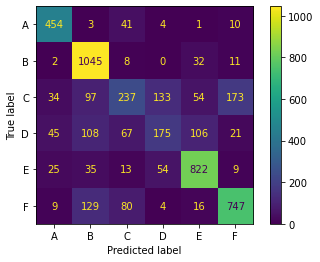

In [71]:
ConfusionMatrixDisplay.from_estimator(clf_LR, X_test_scaled, y_test)
plt.show;

## For binary classification: Metrics, ROC and AUC

## Perceptron

In [76]:
# Instantiate
clf_P_bin = Perceptron()
# Fit
clf_P_bin.fit(X_train_scaled, y_bin_train)
# Predict
y_pred_P_test_bin = clf_P_bin.predict(X_test_scaled)

In [75]:
# Checking accuracy for Test
acc_P_bin = clf_P_bin.score(X_test_scaled, y_bin_test)
acc_P

0.5738967527060783

## Least squares

In [80]:
# Instantiate
clf_LSQ_bin = LSQClassifier()
# Fit
clf_LSQ_bin.fit(X_train_scaled, y_bin_train)
# Predict
y_pred_LSQ_test_bin = clf_LSQ_bin.predict(X_test_scaled)

In [81]:
# Checking accuracy for Least square
acc_LSQ_bin = clf_LSQ_bin.score(X_test_scaled, y_bin_test)
acc_LSQ_bin

0.850541215653622

## Logistic regression

In [77]:
# Instantiate
clf_LR_bin = LogisticRegression(max_iter=200)
# Fit
clf_LR_bin.fit(X_train_scaled, y_bin_train)
# Predict
y_pred_LR_test_bin = clf_LR_bin.predict(X_test_scaled)

In [78]:
# Checking accuracy for Logistic Regression
clf_LR_bin.score(X_test_scaled, y_bin_test)

0.8626144879267277

## Metrics

### ROC Curve

In [82]:
# roc curve has been previously imported
y_bin_score_P = clf_P_bin.decision_function(X_test_scaled)
y_bin_score_LSQ = clf_LSQ_bin.decision_function(X_test_scaled) 
y_bin_score_LR = clf_LR_bin.decision_function(X_test_scaled)
tpr_P, fpr_P, _ = roc_curve(y_bin_test, y_bin_score_P, pos_label = 'Fail')
tpr_LSQ, fpr_LSQ, _ = roc_curve(y_bin_test, y_bin_score_LSQ, pos_label = 'Fail')
tpr_LR, fpr_LR, _ = roc_curve(y_bin_test, y_bin_score_LR, pos_label = 'Fail')

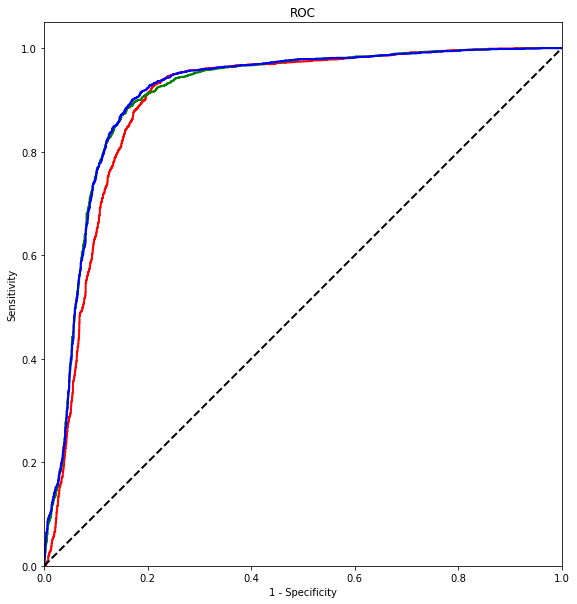

In [83]:
# Plotting the ROC curves
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(fpr_P, tpr_P, color='red', lw=2)
plt.plot(fpr_LSQ, tpr_LSQ, color='green', lw=2)
plt.plot(fpr_LR, tpr_LR, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
ax.set_aspect('equal')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC')
plt.show()

### AUC Curve

In [85]:
# auc curve has already been imported
auc_P = auc(fpr_P, tpr_P)
auc_LSQ = auc(fpr_LSQ, tpr_LSQ)
auc_LR = auc(fpr_LR, tpr_LR)

In [86]:
m_set = ['auc_', 'acc_']
c_set = ['P', 'LSQ', 'LR']
[[(m_item + c_item) for m_item in m_set] for c_item in c_set]

[['auc_P', 'acc_P'], ['auc_LSQ', 'acc_LSQ'], ['auc_LR', 'acc_LR']]

In [87]:
# Making a Pandas DataFrame
pd.DataFrame(
    [[eval(m_item + c_item) for m_item in m_set] for c_item in c_set]
    , index=['Perceptron', 'Least-Squares', 'Logistic Regression'], columns=['AUC', 'Accuracy'])

,AUC,Accuracy
Perceptron,0.894632,0.573897
Least-Squares,0.906802,0.606578
Logistic Regression,0.908226,0.724396


## Conducting multiple trials

In [88]:
# Bringing it all together for a function to run multiple trials
def trial(X, y_bin, y_multi, random_state=None):
    
    if random_state != None:
        X_train, X_test, indices_train, indices_test = train_test_split(X, range(len(X)), test_size = 0.25, random_state = random_state)
    else:
        X_train, X_test, indices_train, indices_test = train_test_split(X, range(len(X)), test_size = 0.25)
        
    y_bin_train = y_bin[indices_train]
    y_bin_test = y_bin[indices_test]
    
    y_multi_train = y_multi[indices_train]
    y_multi_test = y_multi[indices_test]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf_bin_P = Perceptron()
    clf_bin_P.fit(X_train_scaled, y_bin_train)
    y_pred_bin_P_test = clf_bin_P.predict(X_test_scaled)
    
    tp, fn, fp, tn = confusion_matrix(y_bin_test, y_pred_bin_P_test, labels = ['Fail', 'Pass']).ravel()
    acc_P = (tp + tn)/(tp + fn + fp + tn)
    sen_P = (tp)/(tp + fn)
    spe_P = (tn)/(fp + tn)
    ppv_P = (tp)/(tp + fp)
    
    y_score_P = clf_bin_P.decision_function(X_test_scaled)
    fpr_P, tpr_P, _ = roc_curve(y_bin_test, y_score_P, pos_label = 'Fail')
    auc_P = auc(fpr_P, tpr_P)
    
    clf_multi_P = Perceptron()
    clf_multi_P.fit(X_train_scaled, y_multi_train)
    y_pred_multi_P_test = clf_multi_P.predict(X_test_scaled)
    
    cm_true_P = confusion_matrix(y_multi_test, y_pred_multi_P_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'], normalize = 'true')
    cm_pred_P = confusion_matrix(y_multi_test, y_pred_multi_P_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'], normalize = 'pred')
    
    clf_bin_LSQ = LSQClassifier()
    clf_bin_LSQ.fit(X_train_scaled, y_bin_train)
    y_pred_bin_LSQ_test = clf_bin_LSQ.predict(X_test_scaled)
    
    tp, fn, fp, tn = confusion_matrix(y_bin_test, y_pred_bin_LSQ_test, labels = ['Fail', 'Pass']).ravel()
    acc_LSQ = (tp + tn)/(tp + fn + fp + tn)
    sen_LSQ = (tp)/(tp + fn)
    spe_LSQ = (tn)/(fp + tn)
    ppv_LSQ = (tp)/(tp + fp)
    
    y_score_LSQ = clf_bin_LSQ.decision_function(X_test_scaled)
    fpr_LSQ, tpr_LSQ, _ = roc_curve(y_bin_test, y_score_LSQ, pos_label = 'Fail')
    auc_LSQ = auc(fpr_LSQ, tpr_LSQ)
    
    clf_multi_LSQ = LSQClassifier()
    clf_multi_LSQ.fit(X_train_scaled, y_multi_train)
    y_pred_multi_LSQ_test = clf_multi_LSQ.predict(X_test_scaled)
    
    cm_true_LSQ = confusion_matrix(y_multi_test, y_pred_multi_LSQ_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'], normalize = 'true')
    cm_pred_LSQ = confusion_matrix(y_multi_test, y_pred_multi_LSQ_test, labels = ['A', 'B', 'C', 'D', 'E', 'F'], normalize = 'pred')
    
    quad = PolynomialFeatures(degree=2)
    quad.fit(X_train_scaled)
    X_train_scaled_quad = quad.transform(X_train_scaled)
    X_test_scaled_quad = quad.transform(X_test_scaled)
    
    clf_bin_LSQ_quad = LSQClassifier()
    clf_bin_LSQ_quad.fit(X_train_scaled_quad, y_bin_train)
    y_pred_bin_LSQ_test_quad = clf_bin_LSQ_quad.predict(X_test_scaled_quad)

    tp, fn, fp, tn = confusion_matrix(y_bin_test, y_pred_bin_LSQ_test_quad, labels = ['Fail', 'Pass']).ravel()
    acc_LSQ_quad = (tp + tn)/(tp + fn + fp + tn)
    sen_LSQ_quad = (tp)/(tp + fn)
    spe_LSQ_quad = (tn)/(fp + tn)
    ppv_LSQ_quad = (tp)/(tp + fp)
    
    y_score_LSQ_quad = clf_bin_LSQ_quad.decision_function(X_test_scaled_quad)
    fpr_LSQ_quad, tpr_LSQ_quad, _ = roc_curve(y_bin_test, y_score_LSQ_quad, pos_label = 'Fail')
    auc_LSQ_quad = auc(fpr_LSQ_quad, tpr_LSQ_quad)
    
    clf_multi_LSQ_quad = LSQClassifier()
    clf_multi_LSQ_quad.fit(X_train_scaled_quad, y_multi_train)
    y_pred_multi_LSQ_test_quad = clf_multi_LSQ_quad.predict(X_test_scaled_quad)
    
    cm_true_LSQ_quad = confusion_matrix(y_multi_test, y_pred_multi_LSQ_test_quad, labels = ['A', 'B', 'C', 'D', 'E', 'F'], normalize = 'true')
    cm_pred_LSQ_quad = confusion_matrix(y_multi_test, y_pred_multi_LSQ_test_quad, labels = ['A', 'B', 'C', 'D', 'E', 'F'], normalize = 'pred')
    
    return(
        acc_P,
        sen_P,
        spe_P,
        ppv_P,
        auc_P,
        cm_true_P,
        cm_pred_P,
        acc_LSQ,
        sen_LSQ,
        spe_LSQ,
        ppv_LSQ,
        auc_LSQ,
        cm_true_LSQ,
        cm_pred_LSQ,
        acc_LSQ_quad,
        sen_LSQ_quad,
        spe_LSQ_quad,
        ppv_LSQ_quad,
        auc_LSQ_quad,
        cm_true_LSQ_quad,
        cm_pred_LSQ_quad
        )

In [89]:
# Conducting 50 trials
results = []

print('Doing ', end='')
for i in range (50):
    print(i, end ='.')
    result = trial(X, y_bin, y_multi, random_state=i)
    results.append(result)

Doing 0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.

In [92]:
# converting results to numpy array
results = np.array(results, dtype=object)

In [93]:
len(results[0])

21

In [94]:
mean_metrics = []

std_error = []

for i in range(len(results[0])):
    mean_metrics.append(np.mean(np.stack(results[:,i]), axis=0))
    std_error.append(np.std(np.stack(results[:,i]),axis=0)/np.sqrt(len(results)))

In [95]:
print(mean_metrics[20])

[[8.28301837e-01 1.06239513e-02 7.05276078e-03 3.27430887e-04
  3.24758458e-03 3.21258751e-02]
 [3.77358491e-05 7.71673867e-01 1.60334071e-03 0.00000000e+00
  6.13505697e-04 1.72252851e-03]
 [4.17099450e-02 6.72901283e-02 8.82353144e-01 1.19771866e-01
  3.87581288e-02 5.93222118e-02]
 [7.69543030e-02 4.17326500e-02 9.05324344e-02 8.54013682e-01
  8.76639073e-02 2.85305285e-02]
 [3.10229359e-02 2.88616493e-02 1.00645578e-02 2.58870209e-02
  8.45913440e-01 2.26156335e-03]
 [2.19732434e-02 7.98177542e-02 8.39376257e-03 0.00000000e+00
  2.38034337e-02 8.76037293e-01]]


In [96]:
acc_P = mean_metrics[0]
sen_P = mean_metrics[1]
spe_P = mean_metrics[2]
ppv_P = mean_metrics[3]
auc_P = mean_metrics[4]
cm_true_P = mean_metrics[5]
cm_pred_P = mean_metrics[6]
acc_LSQ = mean_metrics[7]
sen_LSQ = mean_metrics[8]
spe_LSQ = mean_metrics[9]
ppv_LSQ = mean_metrics[10]
auc_LSQ = mean_metrics[11]
cm_true_LSQ = mean_metrics[12]
cm_pred_LSQ = mean_metrics[13]
acc_LSQ_Quad = mean_metrics[14]
sen_LSQ_Quad = mean_metrics[15]
spe_LSQ_Quad = mean_metrics[16]
ppv_LSQ_Quad = mean_metrics[17]
auc_LSQ_Quad = mean_metrics[18]
cm_true_LSQ_Quad = mean_metrics[19]
cm_pred_LSQ_Quad = mean_metrics[20]

## Export results

In [97]:
solution_file = r'Data_and_Template.xlsx'

In [98]:
export_results(excelfile)

Be patient. Writing results to Excel file .. 33% done .. 66% done .. All done!
